In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chardet#for encoding
import warnings# to avoid the warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',0)

In [26]:
#Let's see which encoding we have to apply.
with open("new.csv","rb") as f:
    result=chardet.detect(f.read(100000))
print(result)

{'encoding': 'GB2312', 'confidence': 0.99, 'language': 'Chinese'}


## About The Data Set 
url: the url which fetches the data

id: the id of transaction

Lng: and Lat coordinates, using the BD09 protocol.

Cid: community id

tradeTime: the time of transaction

DOM: active days on market.

followers: the number of people follow the transaction.

totalPrice: the total price

price: the average price by square

square: the square of house

livingRoom: the number of living room

drawingRoom: the number of drawing room

kitchen: the number of kitchen

bathroom the number of bathroom

floor: the height of the house.

buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).

constructionTime: the time of construction

renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )

buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).

ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.

elevator: elevator have ( 1 ) or not have elevator( 0 )

fiveYearsProperty: if the owner have the property for less than 5 years,

In [27]:
#so,we have to apply GB2312 encoding.
data=pd.read_csv("new.csv",encoding="GB2312")

In [28]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [29]:
data.shape

(318851, 26)

In [30]:
df0=data.copy()

In [31]:
data.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

In [33]:
data.isnull().sum()

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

"DOM" Have almost 50% missing data.so, we can remove that columns.

buildingType  --->Missing Value ---->2021

elevator----->Missing Value --->32

fiveYearsProperty ---->Missing Value --->32

Subway --->Missing Value ---->32

communityAverage --->Missing Value --->32

<AxesSubplot:>

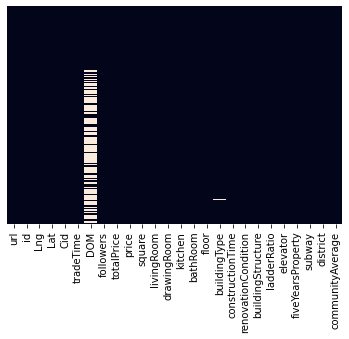

In [34]:
#Let's Visualize the missing value
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

It's Clearly visible DOM have almost half value are missing and building type also have some missing value. so,for DOM columns it's better to drop.

In [35]:
#Drop 'DOM' Columns
data.drop(columns=['DOM'],axis=1,inplace=True)

In [36]:
data.shape

(318851, 25)

In [37]:
data.isnull().sum()

url                       0
id                        0
Lng                       0
Lat                       0
Cid                       0
tradeTime                 0
followers                 0
totalPrice                0
price                     0
square                    0
livingRoom                0
drawingRoom               0
kitchen                   0
bathRoom                  0
floor                     0
buildingType           2021
constructionTime          0
renovationCondition       0
buildingStructure         0
ladderRatio               0
elevator                 32
fiveYearsProperty        32
subway                   32
district                  0
communityAverage        463
dtype: int64

Replacing Our missing Data with Median Value

In [38]:
data['buildingType'].fillna(data.buildingType.mode(),inplace=True)

In [39]:
data.elevator.fillna(data.elevator.mode(),inplace=True)

In [40]:
data.fiveYearsProperty.fillna(data.fiveYearsProperty.mode(),inplace=True)

In [41]:
data.subway.fillna(data.subway.median(),inplace=True)

In [42]:
data.communityAverage.fillna(data.communityAverage.median(),inplace=True)

In [46]:
data.livingRoom.unique()

array([2, 3, 1, 4, 5, 6, 9, 0, 7, 8, '1', '4', '3', '2', '5', '7', '9',
       '6', '0', '#NAME?', '8'], dtype=object)

In [47]:
data.floor.unique()
#so,floor have a chinese character...

array(['高 26', '高 22', '中 4', '底 21', '中 6', '中 8', '高 6', '高 10', '中 23',
       '底 11', '底 3', '高 24', '低 23', '中 19', '高 18', '低 25', '中 12',
       '中 14', '中 30', '中 27', '中 5', '低 18', '底 28', '中 11', '低 9',
       '顶 7', '顶 27', '低 6', '中 17', '顶 6', '中 24', '中 15', '底 5', '中 29',
       '顶 19', '顶 5', '中 9', '低 22', '顶 18', '低 16', '高 13', '高 9',
       '高 17', '底 6', '中 28', '低 26', '底 15', '高 16', '底 2', '低 7',
       '中 13', '低 33', '底 14', '高 15', '底 4', '顶 11', '中 32', '顶 16',
       '底 18', '顶 17', '低 14', '低 10', '底 20', '高 12', '低 31', '低 30',
       '低 19', '低 12', '中 10', '中 16', '顶 20', '底 19', '中 31', '低 13',
       '底 10', '高 25', '中 21', '中 20', '高 20', '低 21', '低 24', '顶 4',
       '高 21', '高 7', '中 22', '底 1', '中 7', '底 8', '顶 15', '中 18', '高 28',
       '顶 14', '顶 13', '低 20', '底 26', '低 17', '顶 24', '底 23', '顶 3',
       '顶 21', '底 24', '高 30', '高 11', '底 25', '高 27', '底 9', '低 11',
       '低 28', '低 15', '顶 26', '低 34', '顶 12', '中 25', '高 8', '底 17',
       '

In [48]:
data.bathRoom.unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 2006, 2003, 1990, 2000, 1996, 2005, 2011,
       '1', '2', '0', '3', '4', '5', '未知', 1994, 2004, '2003', '7'],
      dtype=object)

In [49]:
data.drawingRoom.unique()

array([1, 2, 0, 4, 3, 5, '0', '1', '2', '3', '4', '中 14', '中 15', '中 16',
       '中 6', '高 14', '顶 6', '低 6', '低 16', '高 12', '低 15', '5', '高 6',
       '底 28', '底 11', '中 24', '底 20', '中 22'], dtype=object)

In [50]:
def Trade_Time(x):
    return x[0:4]
data['tradeTime']=data['tradeTime'].apply(Trade_Time)
data.head()

,url,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


### Handling these Column in right Data Type 

In [51]:
#convert tradetime into int numeric
data['tradeTime'] = pd.to_numeric(data['tradeTime'])
data['livingRoom'] = data['livingRoom'].apply(pd.to_numeric, errors='coerce')
data['drawingRoom'] = data['drawingRoom'].apply(pd.to_numeric, errors='coerce')
data['bathRoom'] = data['bathRoom'].apply(pd.to_numeric, errors='coerce')
#convert ConstructionTime into int numeric
data['constructionTime'] = data['constructionTime'].apply(pd.to_numeric, errors='coerce')

we,can't apply this method for floor columns Because all the value are not numeric.

In [52]:
#now if we check livingRoom Column it is clean data.
data.livingRoom.unique()

array([ 2.,  3.,  1.,  4.,  5.,  6.,  9.,  0.,  7.,  8., nan])

#### Handling  Floor Columns

In [53]:
#Now,Split the column into a Floor_Type and Floor_Height
def Floor_Type(x):
    return x.split(' ')[0]

def Floor_Height(y):
    try:
        return int(y.split(' ')[1])
    except:
        return np.nan

data['floor_type']=data['floor'].apply(Floor_Type)    
data['floor_height']=data['floor'].apply(Floor_Height)

In [54]:
data.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage',
       'floor_type', 'floor_height'],
      dtype='object')

### Let's Drop unnecessary columns 
As for the price column, we drop it because price is just totalPrice/square, which are the features already in the dataset


In [55]:
data=data.drop(columns=['floor','url','id','Cid','price'])
data.head()

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floor_type,floor_height
0,116.475489,40.019520,2016,106,415.0,131.00,2.0,1.0,1,1.0,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0,高,26.0
1,116.453917,39.881534,2016,126,575.0,132.38,2.0,2.0,1,2.0,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0,高,22.0
2,116.561978,39.877145,2016,48,1030.0,198.00,3.0,2.0,1,3.0,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0,中,4.0
3,116.438010,40.076114,2016,138,297.5,134.00,3.0,1.0,1,1.0,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0,底,21.0
4,116.428392,39.886229,2016,286,392.0,81.00,2.0,1.0,1,1.0,4.0,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0,中,6.0


### Now Let's Handle Categorical Data 
1> renovationCondition

2> buildingStructure

3> buildingType

4> district

5> elevator

6> floor_type

In [56]:
#Let's Perform one hot encoding
print(data.buildingType.unique())
print(data.renovationCondition.unique())
print(data.buildingStructure.unique())
#so,for buildingType we have a data like 0.5   0.333 0.125 0.25  0.429 0.048 0.375 0.667
# Which is unnecessary so,we have to remove them

[1.    4.    3.      nan 2.    0.5   0.333 0.125 0.25  0.429 0.048 0.375
 0.667]
[3 4 1 2 0]
[6 2 4 1 5 3 0]


In [57]:
#Removing unnecessary data which is present in buildingType
data=data[data['buildingType']>=1]

In [58]:
print(data.buildingType.unique())
print(data.shape)

[1. 4. 3. 2.]
(316798, 22)


In [59]:
#let's take a copy of our data for future use
df=data.copy()

In [60]:
col_for_dummies=['renovationCondition','buildingStructure','buildingType',
                 'district','elevator','floor_type']
data=pd.get_dummies(data=data,columns=col_for_dummies,drop_first=True)

In [61]:
data.head()

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,fiveYearsProperty,subway,communityAverage,floor_height,renovationCondition_2,renovationCondition_3,renovationCondition_4,buildingStructure_2,buildingStructure_3,buildingStructure_4,buildingStructure_5,buildingStructure_6,buildingType_2.0,buildingType_3.0,buildingType_4.0,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13,elevator_1.0,floor_type_低,floor_type_底,floor_type_未知,floor_type_顶,floor_type_高
0,116.475489,40.019520,2016,106,415.0,131.00,2.0,1.0,1,1.0,2005.0,0.217,0.0,1.0,56021.0,26.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,116.453917,39.881534,2016,126,575.0,132.38,2.0,2.0,1,2.0,2004.0,0.667,1.0,0.0,71539.0,22.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,116.561978,39.877145,2016,48,1030.0,198.00,3.0,2.0,1,3.0,2005.0,0.500,0.0,0.0,48160.0,4.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,116.438010,40.076114,2016,138,297.5,134.00,3.0,1.0,1,1.0,2008.0,0.273,0.0,0.0,51238.0,21.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
4,116.428392,39.886229,2016,286,392.0,81.00,2.0,1.0,1,1.0,1960.0,0.333,1.0,1.0,62588.0,6.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
print(data.shape)
print(df0.shape)

(316798, 45)
(318851, 26)


In [63]:
data=data.dropna(axis=0)

In [64]:
print(data.shape)

(297990, 45)


In [65]:
data.columns

Index(['Lng', 'Lat', 'tradeTime', 'followers', 'totalPrice', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'constructionTime',
       'ladderRatio', 'fiveYearsProperty', 'subway', 'communityAverage',
       'floor_height', 'renovationCondition_2', 'renovationCondition_3',
       'renovationCondition_4', 'buildingStructure_2', 'buildingStructure_3',
       'buildingStructure_4', 'buildingStructure_5', 'buildingStructure_6',
       'buildingType_2.0', 'buildingType_3.0', 'buildingType_4.0',
       'district_2', 'district_3', 'district_4', 'district_5', 'district_6',
       'district_7', 'district_8', 'district_9', 'district_10', 'district_11',
       'district_12', 'district_13', 'elevator_1.0', 'floor_type_低',
       'floor_type_底', 'floor_type_未知', 'floor_type_顶', 'floor_type_高'],
      dtype='object')

## EDA  

In [66]:
df1=data[['Lng','Lat','tradeTime','totalPrice','followers','followers','livingRoom','drawingRoom','kitchen',
    'bathRoom','square','communityAverage','ladderRatio']]

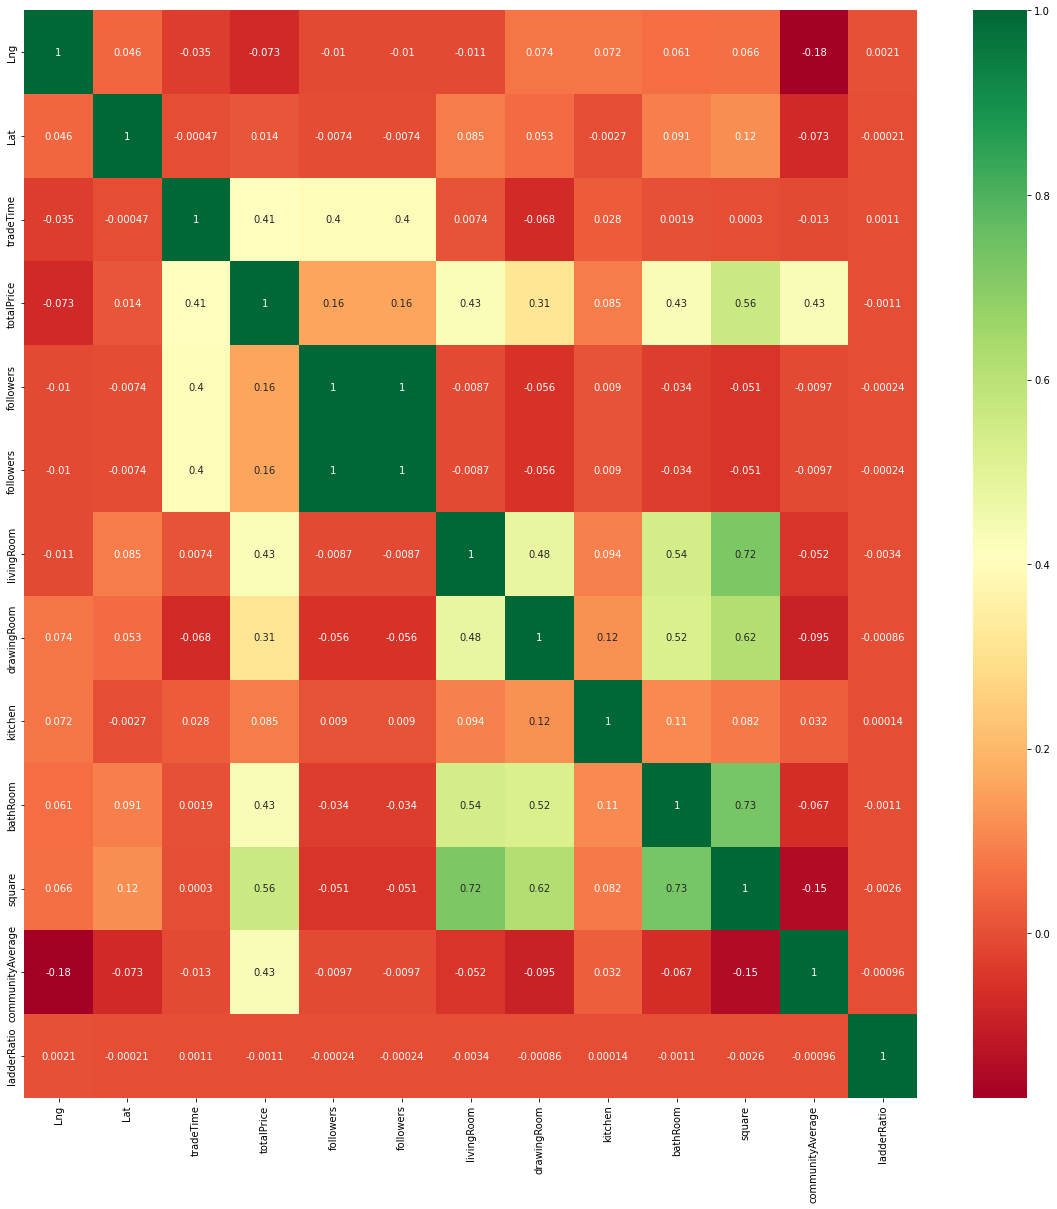

In [67]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,cmap = "RdYlGn")
plt.show()

Summary of Heat-Map

i> totalPrice is highly corellated with community average,square,bathroom,livingroom and Trde Time.

ii> totalprice is highly negative corellated with ladderRatio,lat and lng.

Density Plot

<AxesSubplot:xlabel='totalPrice', ylabel='Density'>

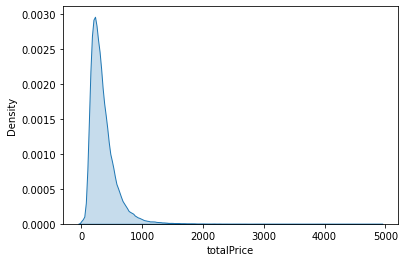

In [68]:
sns.kdeplot(data=data['totalPrice'],shade=True)

So,our most of the output features is lies between 0-2500

In [69]:
data['totalPrice'].describe()

count    297990.000000
mean        349.178136
std         224.530679
min           0.100000
25%         205.000000
50%         295.000000
75%         427.000000
max        4900.000000
Name: totalPrice, dtype: float64

In [70]:
df.head()

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floor_type,floor_height
0,116.475489,40.019520,2016,106,415.0,131.00,2.0,1.0,1,1.0,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0,高,26.0
1,116.453917,39.881534,2016,126,575.0,132.38,2.0,2.0,1,2.0,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0,高,22.0
2,116.561978,39.877145,2016,48,1030.0,198.00,3.0,2.0,1,3.0,4.0,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0,中,4.0
3,116.438010,40.076114,2016,138,297.5,134.00,3.0,1.0,1,1.0,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0,底,21.0
4,116.428392,39.886229,2016,286,392.0,81.00,2.0,1.0,1,1.0,4.0,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0,中,6.0


<AxesSubplot:xlabel='followers', ylabel='communityAverage'>

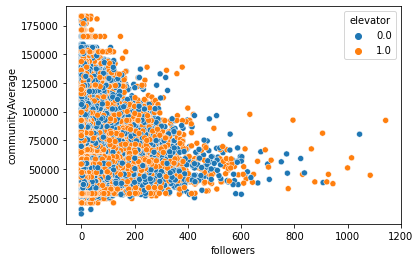

In [71]:
sns.scatterplot(x=df['followers'],y=df['communityAverage'],hue=df['elevator'])

In [ ]:
sns.scatterplot(x=df['totalPrice'],y=df['communityAverage'],hue=df['renovationCondition'])

<AxesSubplot:xlabel='totalPrice', ylabel='communityAverage'>

So,most of the expensive houses have HardCover as a renovation condition

In [ ]:
# sns.swarmplot(x=df['renovationCondition'],
#               y=df['followers'])

In [ ]:
sns.lineplot(data=df['communityAverage'])

Most of the peoples average are lies in 12500-150000 ...

In [ ]:
data.head()

In [ ]:
data.shape

#### Save the updated data in CSV Format 

In [ ]:
data.to_csv("After_EDA.csv")